## PG connection settings

In [1]:
import os

os.environ["TUTORIAL_GRPC_PG_PORT"] = "2345"

## Insert Thing in PG

In [2]:
from tutorial.grpc.geodatas.models.models import Thing, session

test_thing = Thing(
        name="thing: square",
        geom='POLYGON((0 0,1 0,1 1,0 1,0 0))'
    )
session.add(test_thing)

test_thing = Thing(
        name="thing: square",
        geom='POLYGON((0.2 0.2,1 0.2,1 1,0.2 1,0.2 0.2))'
    )
session.add(test_thing)
session.commit()

2019-02-22 21:00:31,087 INFO sqlalchemy.engine.base.Engine select version()
2019-02-22 21:00:31,088 INFO sqlalchemy.engine.base.Engine {}
2019-02-22 21:00:31,091 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-02-22 21:00:31,092 INFO sqlalchemy.engine.base.Engine {}
2019-02-22 21:00:31,094 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-02-22 21:00:31,095 INFO sqlalchemy.engine.base.Engine {}
2019-02-22 21:00:31,097 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-02-22 21:00:31,098 INFO sqlalchemy.engine.base.Engine {}
2019-02-22 21:00:31,100 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-02-22 21:00:31,101 INFO sqlalchemy.engine.base.Engine {}
2019-02-22 21:00:31,106 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
20

/root/.local/share/virtualenvs/2017_GRPC_Tutorial-oVeYm3ns/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## Delete Things

- https://stackoverflow.com/questions/26643727/python-sqlalchemy-deleting-with-the-session-object

In [3]:
# session.query(Thing).filter(Thing.name=="thing: square").delete()
# session.commit()

# session.query(Thing).delete()
# session.commit()

## Query and Drawing Things in from PostGIS

- https://stackoverflow.com/questions/47471872/find-non-overlapping-polygons-in-geodataframe
- http://geopandas.org/io.html?highlight=read_postgis

In [4]:
# !pipenv run pip install geopandas matplotlib descartes

In [42]:
import geopandas as gpd
from tutorial.grpc.geodatas.models.models import engine

gdf = gpd.read_postgis('''SELECT * from thing;''', engine)

2019-02-23 02:04:39,609 INFO sqlalchemy.engine.base.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2019-02-23 02:04:39,613 INFO sqlalchemy.engine.base.Engine {'name': 'SELECT * from thing;'}
2019-02-23 02:04:39,618 INFO sqlalchemy.engine.base.Engine SELECT * from thing;
2019-02-23 02:04:39,620 INFO sqlalchemy.engine.base.Engine {}


In [43]:
gdf

,id,name,geom
0,1,thing: square,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))"
1,2,thing: square,"POLYGON ((0.2 0.2, 1 0.2, 1 1, 0.2 1, 0.2 0.2))"


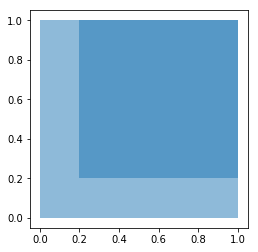

In [44]:
if not gdf.empty:
    gdf.plot(alpha=0.50)